# ex-23 Fit Gamma distribution with myGamma

it_alpha, fit_loc, fit_beta=stats.gamma.fit(data, alpha, floc=0)


In [1]:
import numpy as np
import xarray as xr
from myGamma import gfunc_fit_gamma

import scipy.stats as stats
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
in_file = 'data/PRATE_surface.cmd_mm_9mon.nc'
da_rain = xr.open_dataset(in_file)['PRATE_surface']*24*3600.0
nt, nrow, ncol = da_rain.shape
print(nt, nrow, ncol)

220 190 384


da_rain

In [39]:
prob0 = np.sum(da_rain<=0.0, axis=0)/nt
prob0.shape

(190, 384)

In [40]:
dummy_arr = np.array([0.0, 0.0])

In [41]:
%%time
gamma_coefs = xr.apply_ufunc(
    gfunc_fit_gamma,
    da_rain.chunk({'longitude': 32}), dummy_arr,
    input_core_dims=[["time"], ["dummy"]], 
    output_core_dims=[["dummy"]], 
    exclude_dims=set(("time",)), 
    dask_gufunc_kwargs = {'output_sizes': {"dummy": 2}},   
    dask="parallelized",
    output_dtypes=[da_rain.dtype],
).compute()

Wall time: 355 ms


In [42]:
gamma_coefs

<xarray.DataArray 'PRATE_surface' (latitude: 190, longitude: 384, dummy: 2)>
array([[[3.26957696, 0.04606955],
        [3.27489717, 0.04597062],
        [3.28089338, 0.04581445],
        ...,
        [3.28551352, 0.04596617],
        [3.28807366, 0.04595438],
        [3.26528449, 0.04620261]],

       [[2.69196122, 0.04823127],
        [2.69385212, 0.04827064],
        [2.71547327, 0.04800253],
        ...,
        [2.64561082, 0.04919557],
        [2.64447986, 0.04921661],
        [2.6736927 , 0.04861984]],

       [[2.59139303, 0.04750348],
        [2.62676796, 0.04724095],
        [2.64040904, 0.04711697],
        ...,
...
        ...,
        [3.77994365, 0.16887525],
        [3.76844716, 0.16973435],
        [3.78022762, 0.16949629]],

       [[3.72483306, 0.14855773],
        [3.73075607, 0.14816397],
        [3.7171214 , 0.14837992],
        ...,
        [3.74244915, 0.1477745 ],
        [3.72901974, 0.14827509],
        [3.7196934 , 0.14864686]],

       [[3.50774098, 0.13294151],
        [3.49397788, 0.13339773],
        [3.4855503 , 0.13366393],
        ...,
        [3.5272195 , 0.13224076],
        [3.51710537, 0.13260988],
        [3.51342504, 0.13274879]]])
Coordinates:
  * latitude   (latitude) float64 -89.28 -88.34 -87.4 ... 87.4 88.34 89.28
  * longitude  (longitude) float64 0.0 0.9375 1.875 2.812 ... 357.2 358.1 359.1
Dimensions without coordinates: dummy

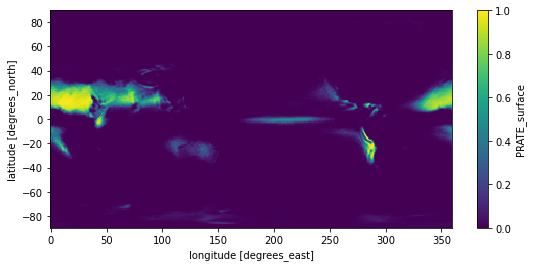

In [53]:
new_coefs = xr.concat([prob0.expand_dims(dim='dummy'), gamma_coefs], dim='dummy')
new_coefs[0].plot(figsize=(9,4), vmin=0, vmax=1.0)

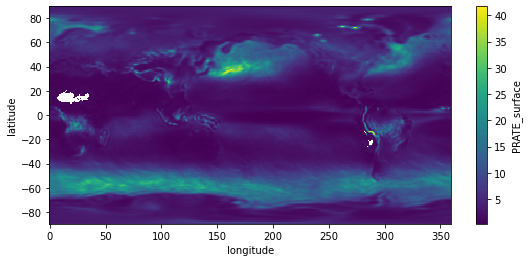

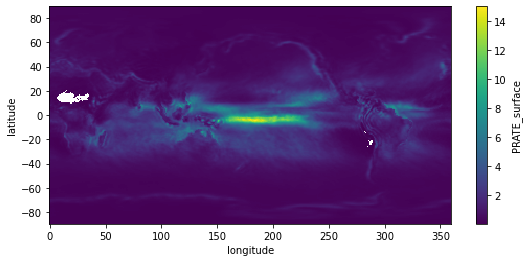

In [35]:
gamma_coefs[:,:,0].plot(figsize=(9,4))
gamma_coefs[:,:,1].plot(figsize=(9,4))

In [7]:
gamma_coefs.max(), gamma_coefs.min()

(<xarray.DataArray 'PRATE_surface' ()>
 array(41.71843816),
 <xarray.DataArray 'PRATE_surface' ()>
 array(0.00044882))

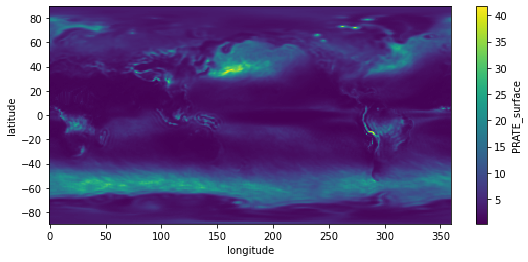

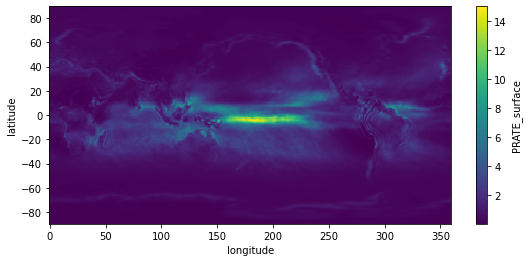

In [8]:
gamma_coefs_filled = gamma_coefs.interpolate_na(dim='latitude')
gamma_coefs_filled[:,:,0].plot(figsize=(9,4))
gamma_coefs_filled[:,:,1].plot(figsize=(9,4))

In [9]:
%%time
for irow in np.arange(1):
    for icol in np.arange(1):
        data = da_rain[:,irow, icol]
        data = data[data>0]
        it_alpha, fit_loc, fit_beta=stats.gamma.fit(data, floc=0)
        print(it_alpha, fit_beta)

3.2695795144880617 0.04606951451271188
Wall time: 1.99 ms


In [10]:
gamma_coefs[0,0,:]

<xarray.DataArray 'PRATE_surface' (dummy: 2)>
array([3.26957696, 0.04606955])
Coordinates:
    latitude   float64 -89.28
    longitude  float64 0.0
Dimensions without coordinates: dummy